In [1]:

from collections import Counter
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, auc, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.utils import shuffle
import matplotlib.gridspec as gridspec
%matplotlib notebook

In [2]:
data = pd.read_csv("C:/Users/Lenovo/Desktop/credit_card_fraud_detection/data/creditcard.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


c:\Users\Lenovo\Desktop\financial-anomaly-lstm-autoencoder\financeenv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


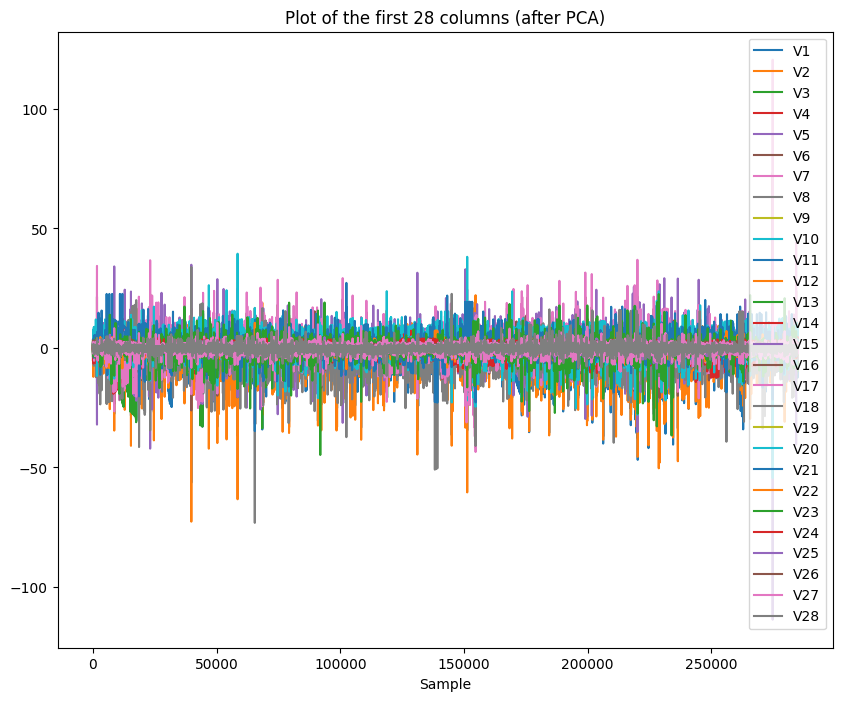

In [4]:

%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
for a in range(1, 29):
    plt.plot(data['V'+str(a)], label=f'V{a}')
plt.legend()
plt.title("Plot of the first 28 columns (after PCA)")
plt.xlabel("Sample")
plt.show()



In [5]:
data.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

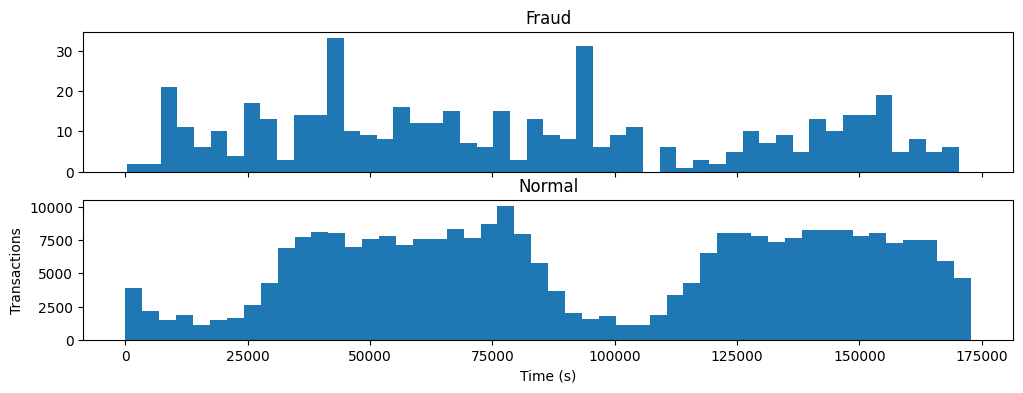

In [6]:

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
ax1.hist(data.Time[data.Class == 1], bins = 50)
ax1.set_title('Fraud')
ax2.hist(data.Time[data.Class == 0], bins = 50)
ax2.set_title('Normal')
plt.xlabel('Time (s)')
plt.ylabel('Transactions')
plt.show()

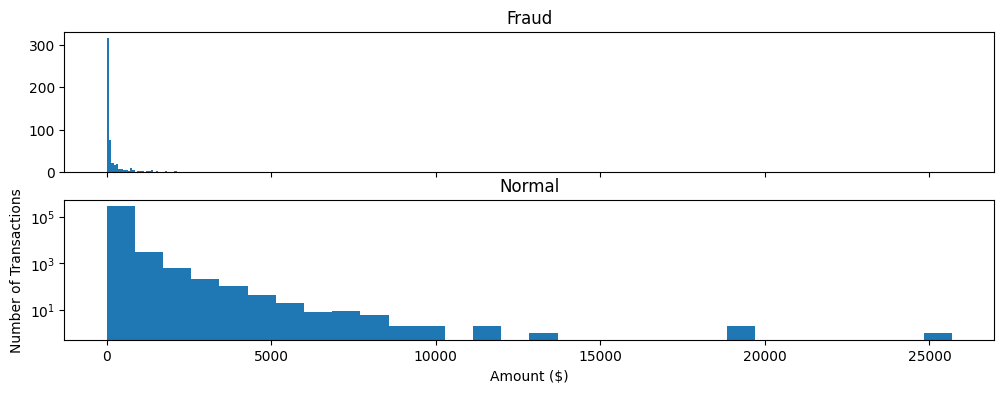

In [7]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))
ax1.hist(data.Amount[data.Class == 1], bins = 30)
ax1.set_title('Fraud')
ax2.hist(data.Amount[data.Class == 0], bins = 30)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8296\415084756.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['V'+str(i)][data.Class == 1], bins=50)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8296\415084756.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['V'+str(i)][data.Class 

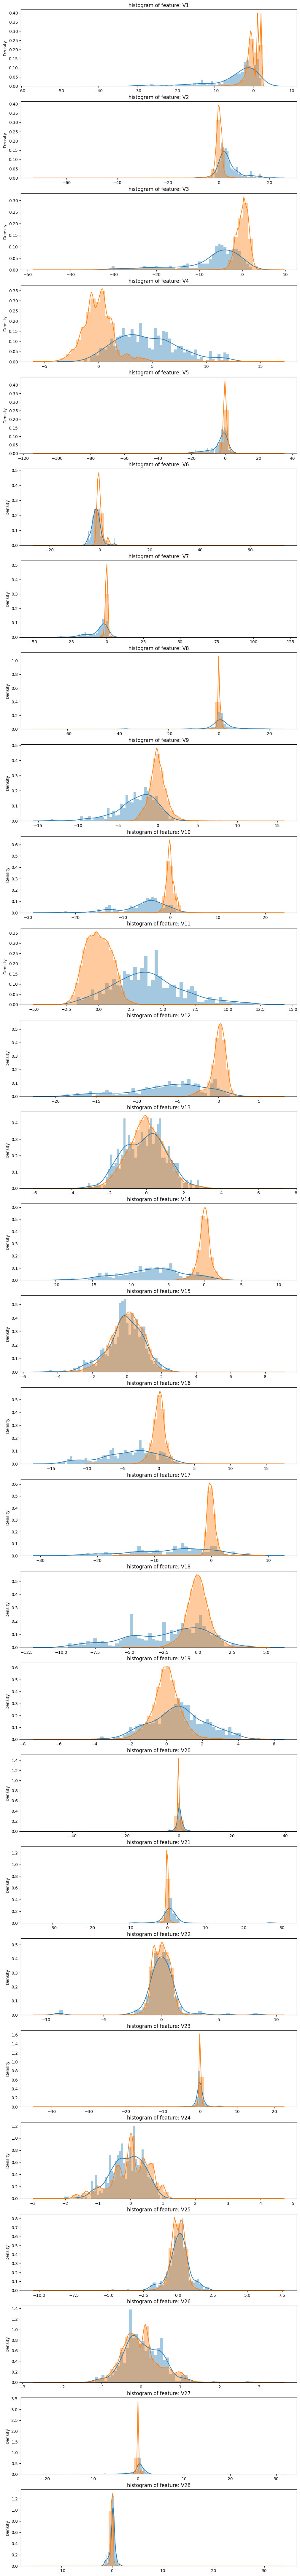

<Figure size 640x480 with 0 Axes>

In [8]:
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i in range(1, 29):
    ax = plt.subplot(gs[i-1])
    sns.distplot(data['V'+str(i)][data.Class == 1], bins=50)
    sns.distplot(data['V'+str(i)][data.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + 'V'+str(i))
plt.show()
plt.tight_layout()

## # Converting the resampled trained data in to dataframe

In [22]:
import sys
import os

# Add the project root directory to sys.path
sys.path.append(os.path.abspath(".."))

In [23]:
from src.data_split import data_split_function

In [24]:
X_train, X_test, X_validation = data_split_function()

In [25]:
with open('pickle/train_data_resampled.pkl', 'rb') as f:
    X_train_resampled = pickle.load(f)
with open('pickle/train_data_labels_resampled.pkl', 'rb') as f:
    X_train_labels_resampled = pickle.load(f)
    
print(Counter(X_train_labels_resampled))
    
X_train_resampled = pd.DataFrame(X_train_resampled)
X_train_labels_resampled = pd.DataFrame(X_train_labels_resampled)
X_train_resampled = pd.concat([X_train_resampled, X_train_labels_resampled], axis=1)
X_train_resampled.columns = X_train.columns
X_train_resampled.head()



Counter({np.int64(0): 227452, np.int64(1): 227320})


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,92092.0,-1.108478,3.448953,-6.216972,3.021052,-0.529901,-2.551375,-2.001743,1.092432,-0.836098,...,0.825951,1.144170,0.208559,-0.295497,-0.690232,-0.364749,0.229327,0.208830,18.00,1
1,41204.0,-8.440284,6.147653,-11.683706,6.702780,-8.155839,-3.716264,-12.407313,5.626571,-6.232161,...,2.192855,-0.282597,0.008068,0.403858,-0.018788,0.522722,0.792691,0.067790,30.26,1
2,55760.0,-6.003422,-3.930731,-0.007045,1.714669,3.414667,-2.329583,-1.901512,-2.746111,0.887673,...,1.101671,-0.992494,-0.698259,0.139898,-0.205151,-0.472412,1.775378,-0.104285,311.91,1
3,95628.0,-17.518909,12.572118,-19.038538,11.190895,-13.554721,-0.411924,-23.189397,-5.301412,-8.630390,...,-4.969478,0.976125,1.841248,0.334418,-0.720128,-0.232603,-3.021992,-0.478158,1.63,1
4,91407.0,-3.951209,2.881805,-6.421490,2.434181,-1.327325,-2.122106,-3.227533,-0.685560,0.775985,...,1.410479,0.279403,0.570821,0.656271,-0.298601,-0.407571,-1.378703,1.379130,52.69,1


### Shuffling the datasets once more to ensure random feeding into the classification algorithms

In [26]:
X_train = shuffle(X_train)
X_test = shuffle(X_test)
X_validation = shuffle(X_validation)
X_train_ = shuffle(X_train_resampled)
X_test_ = shuffle(X_test)
X_validation_ = shuffle(X_validation)
data_resampled = pd.concat([X_train_, X_test_, X_validation_])

In [37]:
from src.data_split import data_split_function, scale_with_standard_scaler

In [38]:
# ORIGINAL splits
X_train_scaled, X_test_scaled, X_validation_scaled = scale_with_standard_scaler(
    X_train, X_test, X_validation, data
)

# RESAMPLED splits
X_train_resampled_scaled, X_test_resampled_scaled, X_validation_resampled_scaled = scale_with_standard_scaler(
    X_train_, X_test_, X_validation_, data
)

In [39]:

# Create labels
y_train = X_train.Class
y_test = X_test.Class
y_validation = X_validation.Class
y_train_ = X_train_.Class
y_test_ = X_test_.Class
y_validation_ = X_validation_.Class
# Remove labels from X's
X_train = X_train.drop(['Class'], axis=1)
X_train_ = X_train_.drop(['Class'], axis=1)
X_test = X_test.drop(['Class'], axis=1)
X_test_ = X_test_.drop(['Class'], axis=1)
X_validation = X_validation.drop(['Class'], axis=1)
X_validation_ = X_validation_.drop(['Class'], axis=1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
129498,79112.0,-5.352705,4.002020,-0.805070,-2.336307,-1.028520,-0.731705,0.130939,0.702140,3.525040,...,2.093847,-0.759573,-0.434147,0.093393,-0.316144,0.440777,0.688257,0.565970,-0.328458,0.22
283370,171546.0,2.040759,0.212604,-1.475151,0.533072,0.211001,-1.164487,0.230587,-0.298835,0.380302,...,-0.141256,-0.325279,-0.806769,0.398123,1.066238,-0.309102,0.138023,-0.058469,-0.024260,0.89
264781,161593.0,-0.243770,0.102313,0.018585,-1.073950,1.283385,-0.180202,1.147448,-0.161693,-0.235082,...,0.121448,-0.141061,-0.559246,0.251065,0.046077,-0.975028,0.107139,-0.081370,-0.015201,76.35
244111,152210.0,-0.785662,0.111319,1.023519,-2.205985,0.679286,0.724311,0.665246,0.109026,-1.365844,...,-0.238402,-0.279883,-0.435775,-0.371236,-0.379403,0.993440,-0.609442,0.043289,0.055160,76.40
5157,4881.0,-0.490570,0.702002,2.783861,1.953329,0.719961,2.701743,-0.268521,0.698801,0.724583,...,-0.214937,-0.046612,0.509522,-0.025911,-1.086947,-0.540906,-0.039530,-0.054029,-0.212923,0.75


In [41]:
# Pickle and save the dataset
dataset = {'X_train' : X_train,
           'X_train_': X_train_,
           'X_test': X_test,
           'X_test_': X_test,
           'X_validation': X_validation,
           'X_validation_': X_validation_,
           'y_train': y_train,
           'y_train_': y_train_,
           'y_test': y_test,
           'y_test_': y_test_,
           'y_validation': y_validation,
           'y_validation_': y_validation_}
with open('pickle/unscaled_data_with_resample_apr19.pkl', 'wb+') as f:
    pickle.dump(dataset, f)

In [42]:
dataset = {
    'X_train': X_train_scaled,
    'X_train_': X_train_resampled_scaled,
    'X_test': X_test_scaled,
    'X_test_': X_test_resampled_scaled,
    'X_validation': X_validation_scaled,
    'X_validation_': X_validation_resampled_scaled,
    'y_train': y_train,
    'y_train_': y_train_,
    'y_test': y_test,
    'y_test_': y_test_,
    'y_validation': y_validation,
    'y_validation_': y_validation_
}

with open('pickle/data_scaled.pkl', 'wb') as f:
    pickle.dump(dataset, f)


In [43]:
with open('pickle/data_scaled.pkl', 'rb+') as f:
    dataset = pickle.load(f)

In [45]:

from collections import Counter

for k, v in dataset.items():
    if 'y' in k:
        print(k, Counter(v))


y_train Counter({0: 227452, 1: 394})
y_train_ Counter({0: 227452, 1: 227320})
y_test Counter({0: 39812, 1: 61})
y_test_ Counter({0: 39812, 1: 61})
y_validation Counter({0: 17051, 1: 37})
y_validation_ Counter({0: 17051, 1: 37})


# Now moving towards the MACHINE LEARNING

### 1. Support Vector Machine

In [47]:
# Linear SVM on unsampled training data
lsvm = svm.LinearSVC(C=1.0, dual=False)
lsvm.fit(dataset['X_train'], dataset['y_train'])
y_pred = lsvm.predict(dataset['X_test'])


In [50]:
from src.helper_functions import plot_confusion_matrix

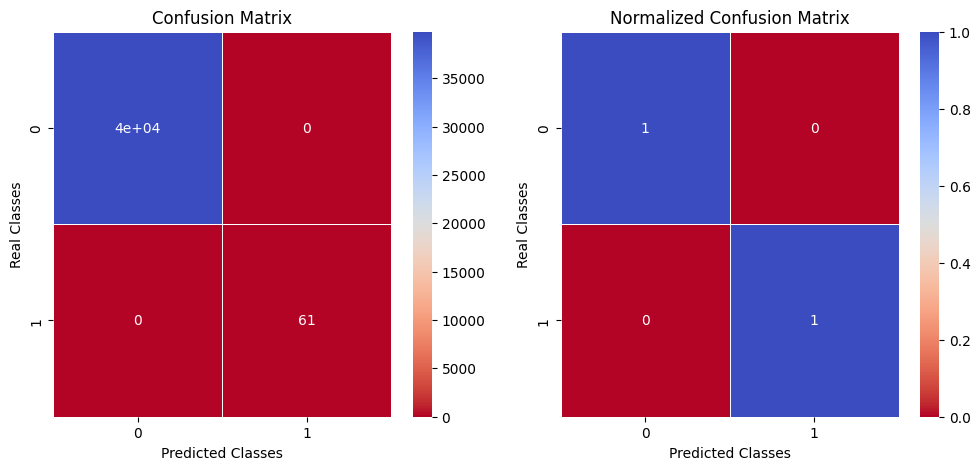

---Classification Report---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39812
           1       1.00      1.00      1.00        61

    accuracy                           1.00     39873
   macro avg       1.00      1.00      1.00     39873
weighted avg       1.00      1.00      1.00     39873



In [51]:
plot_confusion_matrix(dataset['y_test'], y_pred)

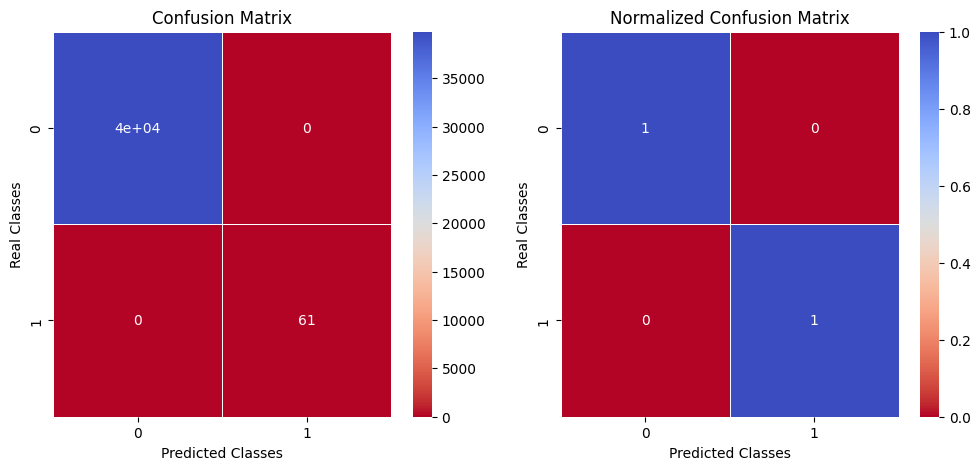

---Classification Report---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39812
           1       1.00      1.00      1.00        61

    accuracy                           1.00     39873
   macro avg       1.00      1.00      1.00     39873
weighted avg       1.00      1.00      1.00     39873



In [52]:
# Linear SVM on ADASYN training data #svm_adasyn_unweighted_c0_01
lsvm = svm.LinearSVC(C=1, dual=False)
lsvm.fit(dataset['X_train_'], dataset['y_train_'])
y_pred = lsvm.predict(dataset['X_test_'])
plot_confusion_matrix(dataset['y_test_'], y_pred)

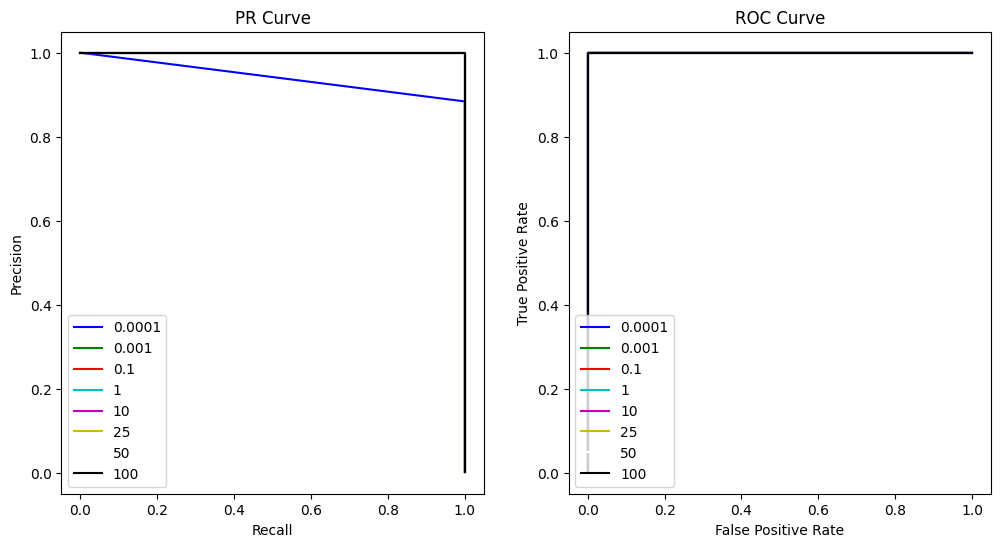

In [54]:
# Not ready to give up on ADASYN, try finding the best C value
# svm_prec_recal_adasyn_different_c
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlim([-0.05,1.05])
ax1.set_ylim([-0.05,1.05])
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('PR Curve')

ax2 = fig.add_subplot(1,2,2)
ax2.set_xlim([-0.05,1.05])
ax2.set_ylim([-0.05,1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve')

for c,k in zip([0.0001, 0.001, 0.1, 1, 10, 25, 50, 100],'bgrcmywk'):
    lsvm_ = svm.LinearSVC(C=c, dual=False, class_weight={1:1,0:1})
    lsvm_.fit(dataset['X_train_'], dataset['y_train_'])
    y_pred = lsvm_.predict(dataset['X_test_'])

    p,r,_ = precision_recall_curve(dataset['y_test_'], y_pred)
    tpr,fpr,_ = roc_curve(dataset['y_test_'], y_pred)
    
    ax1.plot(r,p,c=k,label=c)
    ax2.plot(tpr,fpr,c=k,label=c)

ax1.legend(loc='lower left')    
ax2.legend(loc='lower left')
plt.show()

0.0001
0.001
0.1
1
10
25
50
100


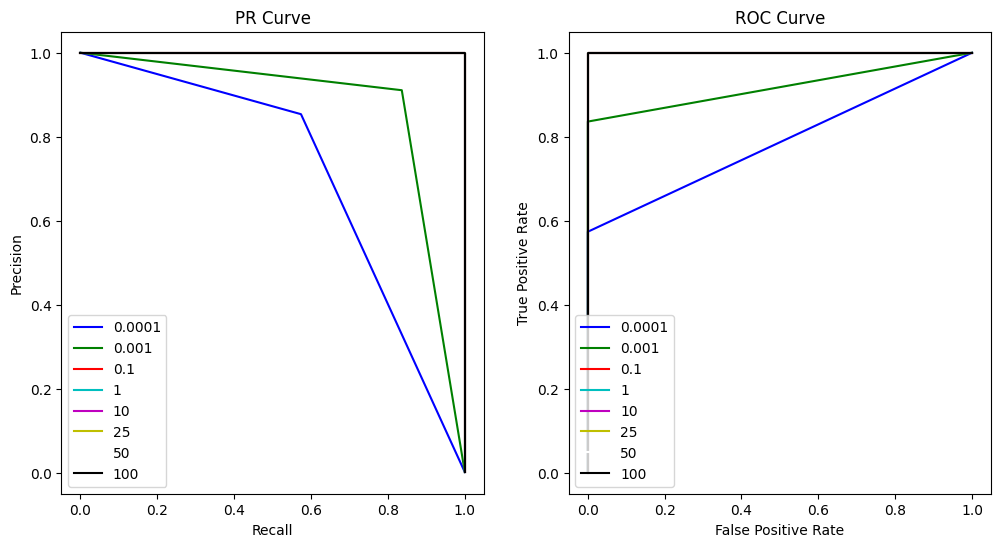

In [55]:

# Same as above but with unsampled data
# svm_prec_recal_unsampled_unweighted_different_c
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlim([-0.05,1.05])
ax1.set_ylim([-0.05,1.05])
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('PR Curve')

ax2 = fig.add_subplot(1,2,2)
ax2.set_xlim([-0.05,1.05])
ax2.set_ylim([-0.05,1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve')

for c,k in zip([0.0001, 0.001, 0.1, 1, 10, 25, 50, 100],'bgrcmywk'):
    print(c)
    lsvm_ = svm.LinearSVC(C=c, dual=False, class_weight={1:1,0:1})
    lsvm_.fit(dataset['X_train'], dataset['y_train'])
    y_pred = lsvm_.predict(dataset['X_test'])

    p,r,_ = precision_recall_curve(dataset['y_test'], y_pred)
    tpr,fpr,_ = roc_curve(dataset['y_test'], y_pred)
    
    ax1.plot(r,p,c=k,label=c)
    ax2.plot(tpr,fpr,c=k,label=c)

ax1.legend(loc='lower left')    
ax2.legend(loc='lower left')
plt.show()
# Conclusion: c > 0.1 is best

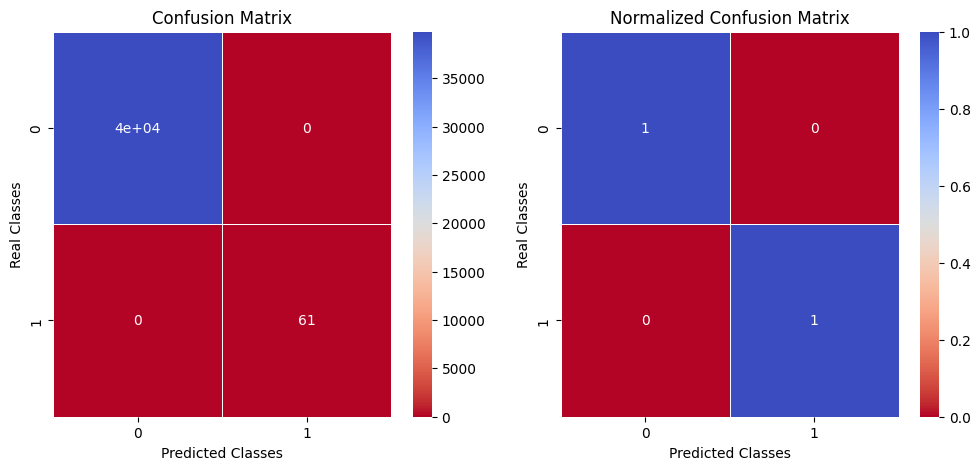

---Classification Report---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39812
           1       1.00      1.00      1.00        61

    accuracy                           1.00     39873
   macro avg       1.00      1.00      1.00     39873
weighted avg       1.00      1.00      1.00     39873



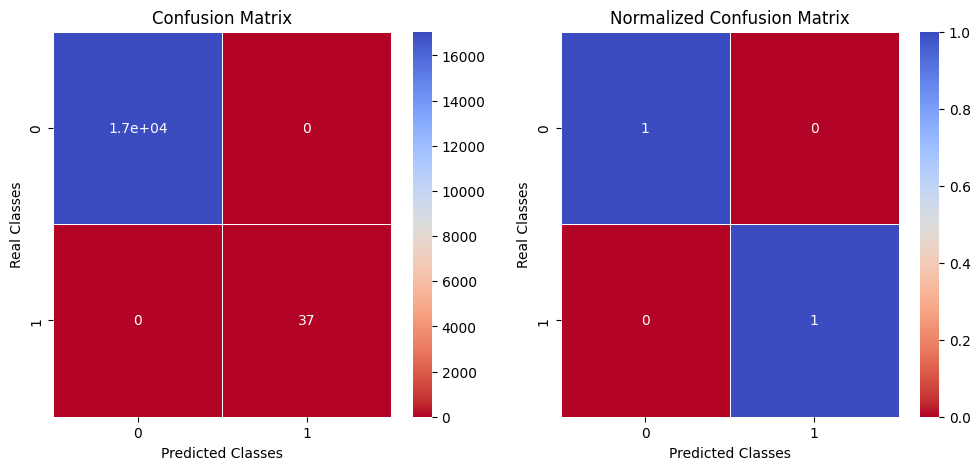

---Classification Report---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17051
           1       1.00      1.00      1.00        37

    accuracy                           1.00     17088
   macro avg       1.00      1.00      1.00     17088
weighted avg       1.00      1.00      1.00     17088



In [56]:
# Linear SVM on WEIGHTED ADASYN training data with minority class weight of 10
# svm_adasyn_c_1_weight_10
lsvm = svm.LinearSVC(C=1, dual=False, class_weight={1:10,0:1})
lsvm.fit(dataset['X_train_'], dataset['y_train_'])
y_pred = lsvm.predict(dataset['X_test_'])
y_pred_validation = lsvm.predict(dataset['X_validation_'])
plot_confusion_matrix(dataset['y_test_'], y_pred)
plot_confusion_matrix(dataset['y_validation_'], y_pred_validation)

## 2. Random Forest

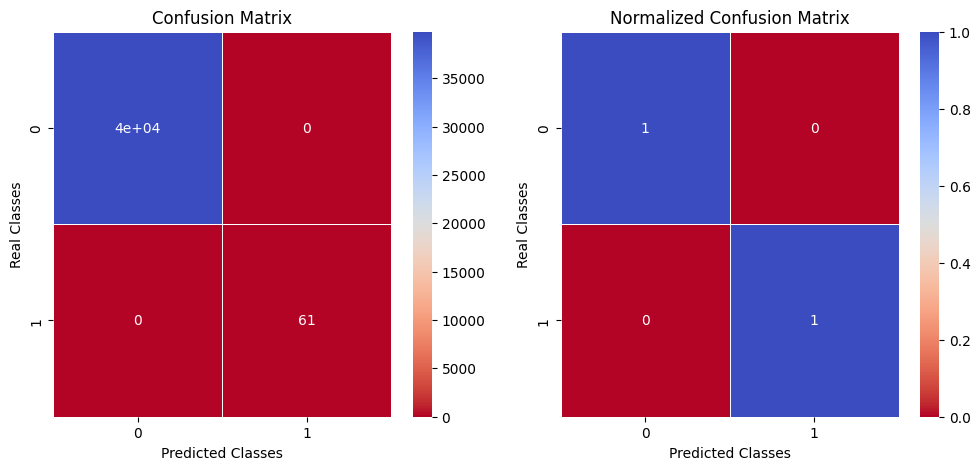

---Classification Report---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39812
           1       1.00      1.00      1.00        61

    accuracy                           1.00     39873
   macro avg       1.00      1.00      1.00     39873
weighted avg       1.00      1.00      1.00     39873



In [57]:

# Random Forest on unsampled training data
# rf_n_est_100_unsampled_unweighted
rf = RandomForestClassifier(n_estimators=100, oob_score=True, n_jobs=4)
rf.fit(dataset['X_train'], dataset['y_train'])
y_pred = rf.predict(dataset['X_test'])
plot_confusion_matrix(dataset['y_test'], y_pred)

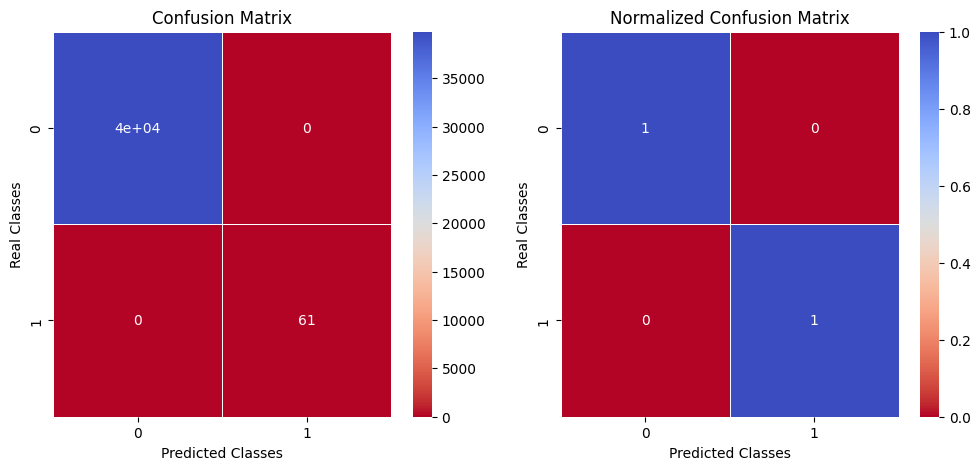

---Classification Report---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39812
           1       1.00      1.00      1.00        61

    accuracy                           1.00     39873
   macro avg       1.00      1.00      1.00     39873
weighted avg       1.00      1.00      1.00     39873



In [58]:
# Random Forest on ADASYN training data
rf_adasyn = RandomForestClassifier(n_estimators=100, oob_score=True, n_jobs=4)
rf_adasyn.fit(dataset['X_train_'], dataset['y_train_'])
y_pred = rf_adasyn.predict(dataset['X_test_'])
plot_confusion_matrix(dataset['y_test_'], y_pred)

## Precision Recall curves

10
50
100
250
500
1000


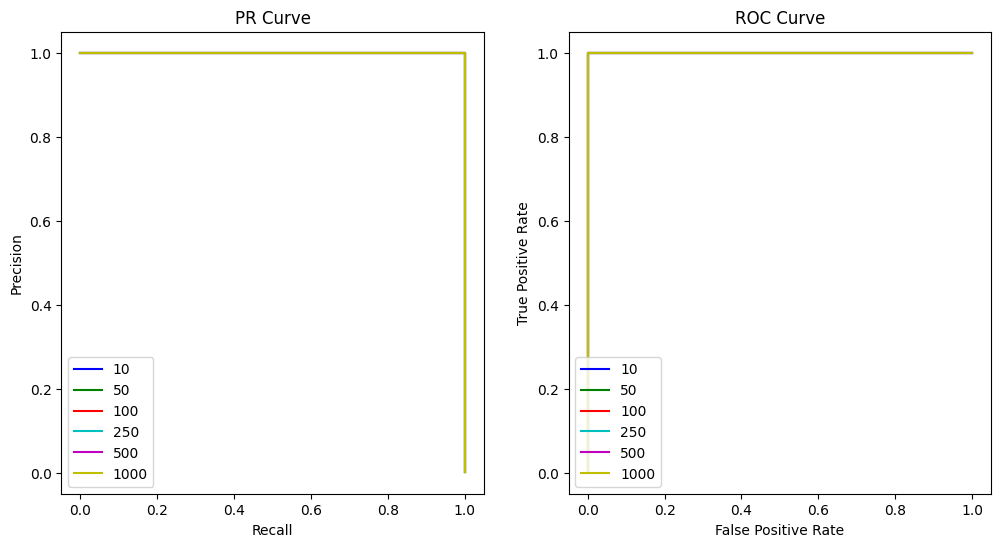

In [59]:
# Unsampled training data # rf_prec_recall_n_est_unsampled_unweighted
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlim([-0.05,1.05])
ax1.set_ylim([-0.05,1.05])
ax1.set_xlabel('Recall')
ax1.set_ylabel('Precision')
ax1.set_title('PR Curve')

ax2 = fig.add_subplot(1,2,2)
ax2.set_xlim([-0.05,1.05])
ax2.set_ylim([-0.05,1.05])
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve')

for n_est,k in zip([10, 50, 100, 250, 500, 1000],'bgrcmy'):
    print(n_est)
    rf = RandomForestClassifier(n_estimators=n_est, bootstrap=False, max_features=0.33, n_jobs=4)
    rf.fit(dataset['X_train'], dataset['y_train'])
    y_pred = rf.predict(dataset['X_test'])

    p,r,_ = precision_recall_curve(dataset['y_test'], y_pred)
    tpr,fpr,_ = roc_curve(dataset['y_test'], y_pred)
    
    ax1.plot(r,p,c=k,label=n_est)
    ax2.plot(tpr,fpr,c=k,label=n_est)

ax1.legend(loc='lower left')
ax2.legend(loc='lower left')
plt.show()
# Conclusion: n_estimators=100 is best